In [3]:
#regex for special characters
from random import random
import os, re, pandas as pd
from datetime import datetime
from fake_collector.configs.directory_config import Directories
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [153]:
politifact = pd.read_csv(ROOT_DIR+"/data/fakenews_sources/politifact_scape_2609.csv")

dont_sample = politifact[politifact.claim.str.contains('don\'t')]

sample = dont_sample.sample(10, random_state=42).reset_index()

test = 0

sample.claim[test]

'The United States has "10,000 IRS agents making sure that you don\'t take an improper charity deduction," but to fight terrorism, it has "less than two dozen people focusing on countering violent extremism at home."'

In [152]:
def remove_excluded_words(text):
    stop_words = set(stopwords.words('english'))
    
    tweet_tokenizer = TweetTokenizer()
    word_tokens = tweet_tokenizer.tokenize(text)
    #stopword removal
    word_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    #special characters
    word_tokens = [w for w in word_tokens if not re.match(r"[^A-Za-z0-9]", w)]
    filtered_sentence = []
    
    return " ".join(word_tokens)


In [155]:

remove_excluded_words(sample.claim[test])

'United States 10,000 IRS agents making sure take improper charity deduction fight terrorism less two dozen people focusing countering violent extremism home'

In [156]:
def set_character_limit(character_limit, text):
    tweet_tokenizer = TweetTokenizer()
    word_tokens = tweet_tokenizer.tokenize(text) 
    
    sentence = [" ".join([w]) for w in word_tokens if len(sentence)<character_limit]
    
    return sentence
    

In [138]:

def clean_claims(sample):
    # #Cleaning step 1 - getting rid of \n appearances and weird spaces
    # sample['claim'] = sample.claim.apply(lambda x: x.strip())

    # #Cleaning from all special characters - note the \w'\w is to avoid removing the ' in don't, won't they've etc.
    # sample['claim'] = sample.claim.apply(lambda x: re.sub(r'[^a-zA-Z0-9 \w\'\w \.,]', '', x))

    # Removing "Says" in the beginning of a statement around 1000 claim quotes in the sample have this sentence structure.
    # Fine to remove as the quote after is the essence of the claim.
    sample['claim'] = sample.claim.apply(lambda x: re.sub(r'^Says', '', x).strip())
    
    # remove stopwords - done in order to avoid query errors such as:
    # "There were errors processing your request: Ambiguous use of and as a keyword. Use a space to logically join two clauses, or \"and\" to find occurrences of and in text
    sample['claim'] = sample.claim.apply(lambda x: remove_excluded_words(x))
    

def reshape_date_format(sample):
    sample['date'] = sample.date.apply(lambda x: str(datetime.strptime(x, '%B %d, %Y').isoformat()+"Z"))
    

In [139]:
    
#Cleaning and preparation
clean_claims(sample)
reshape_date_format(sample)



In [150]:
#sample.claim[test][0:140]

sample.claim[0]

'United States 10,000 IRS agents making sure take improper charity deduction fight terrorism less two dozen people focusing countering violent extremism home'

In [70]:
date = 'November 25, 2018'
datet = str(datetime.strptime(date, '%B %d, %Y').isoformat()+"Z")

In [71]:
datet

'2018-11-25T00:00:00Z'

In [53]:
date_str = '09-19-2018'

date_object = datetime.strptime(date_str, '%m-%d-%Y')[0:-4].date()


<class 'datetime.date'>


In [74]:
str(datetime.today().isoformat()[0:-4]+"Z")

'2022-09-29T11:19:05.86Z'

In [2]:
import pandas as pd

In [4]:
dir = Directories()

In [ ]:
df = pd.read_csv(str(dir.DATA_PATH)+"/fakenews_sources/politifact_scrape_7t_03102022.csv")

In [107]:
#df.groupby(df.origin).count()

df[df.origin=='Instagram posts'].count()



,Unnamed: 0,claim,origin,URL,truth_value,stated_on,topic
4930,4930,A video shows Ukraine President Volodymyr Zele...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 19, 2022",ukraine
4931,4931,A photo of President Joe Biden leaving for Eur...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 23, 2022",ukraine
4932,4932,“The Simpsons” predicted Russia’s invasion of ...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 5, 2022",ukraine
4933,4933,Ukrainian President Volodymyr Zelensky wore a ...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 16, 2022",ukraine
4934,4934,CNN tweeted a picture of a Serbian resort and ...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 21, 2022",ukraine
4935,4935,Video shows “Russian soldiers using weapons th...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 13, 2022",ukraine
4936,4936,The Russian airstrike on a maternity hospital ...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,pants-fire,"March 11, 2022",ukraine
4937,4937,“Ukraine has been shooting residents of Donets...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 20, 2022",ukraine
4938,4938,Photos show “Ukrainian farmers are slowly star...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,false,"March 16, 2022",ukraine
4939,4939,Russian President Vladimir Putin “was assassin...,YouTube videos,https://www.politifact.com/factchecks/2022/mar...,pants-fire,"March 19, 2022",ukraine


In [8]:
sample = pd.read_csv("sample_tweets_for_run0310.csv")

In [27]:
from matplotlib import pyplot as plt

In [46]:
x = df.groupby(df.origin).count().claim.index
y = df.groupby(df.origin).count().claim.values

In [83]:
view = df.groupby(df.origin).count().claim.to_frame()

view.describe()


,claim
count,106.000000
mean,47.160377
std,79.982276
min,11.000000
25%,30.000000
50%,30.000000
75%,30.000000
max,759.000000


In [112]:
view.sort_values(by='claim')

,claim
origin,
Chris Dodd,11
EnergyCitizens.org,13
Glenn Beck,25
John Boehner,25
Occupy Democrats,30
...,...
Bloggers,180
Viral image,210
Instagram posts,240


<BarContainer object of 106 artists>

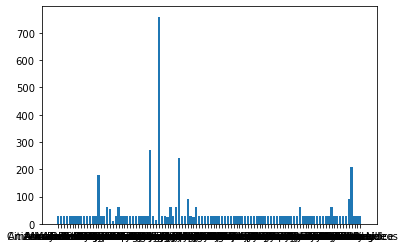

In [48]:
plt.bar(x, y)

In [14]:
from fake_collector.utils.read_lst_jsons import read_lst_of_json_objects

In [19]:
tweets = read_lst_of_json_objects("data/fakenews_tw_output/00001_5_environment_false_2022-07-21.json")

In [24]:
len(tweets[0]['data'])

119